In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot

In [2]:
df = pd.read_csv(r"/content/loan.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Find the percentange of null values in the dataset and remove the columns which have more than 50% of null values

In [3]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 50]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [4]:
missing_values = list(missing[missing >= 50].index)

In [5]:
new_val= df.drop(missing_values,axis=1)


Studied the dataset and found some of the rows that have no relavant details related to the analysis and some had repeated data

In [6]:
new_val = new_val.drop(['id', 'member_id','emp_title','pymnt_plan','url','desc','title','zip_code',],axis=1)

check for the unique data in each of the columns to seperate continous and categorical values

In [7]:
new_val.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status               1
out_prncp                      1137
out_prncp_inv               

Remove the columns which have only one unique value as it does not contribute to analysis

In [8]:
new_val = new_val.drop(new_val.columns[(new_val.nunique() == 1)],axis=1)

In [9]:
new_val[['term','grade','emp_length','home_ownership','verification_status','loan_status','purpose','delinq_2yrs','inq_last_6mths','pub_rec','pub_rec_bankruptcies']].isnull().sum()

term                       0
grade                      0
emp_length              1075
home_ownership             0
verification_status        0
loan_status                0
purpose                    0
delinq_2yrs                0
inq_last_6mths             0
pub_rec                    0
pub_rec_bankruptcies     697
dtype: int64

In [10]:
new_val.dropna().to_csv('clean_Data.csv', encoding='utf-8', index=False)
new_val = pd.read_csv(r"/content/clean_Data.csv")

In [11]:
new_val = new_val.dropna()
new_val.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d  

Now that we have cleaned the data with no null values, we will modify some data according to the need

In [12]:
new_val['term'] =  new_val['term'].str[:3]
new_val['int_rate']=new_val['int_rate'].str[:-1]
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
new_val = new_val.replace({"emp_length": emp_length_dict })
new_val['issue_d_month'] = new_val['issue_d'].str[:3]
new_val['issue_d_year'] = new_val['issue_d'].str[-2:]

Removed the 'month' text from the term column, removed '%' from int_rate and changed the emp_length in usable format, also split the date into month and year

# Analysis

In [13]:
new_val.to_csv('clean_Data.csv', encoding='utf-8', index=False)
clean_data = pd.read_csv(r"/content/clean_Data.csv")
clean_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11


In [14]:
clean_data.shape

(37835, 40)

Now we have a dataset with 40 columns to analyse which is clean and in a good format to analyse

In [15]:
clean_data.loan_status.value_counts()


Fully Paid     31534
Charged Off     5203
Current         1098
Name: loan_status, dtype: int64

Since we cant decide the behaviour of the other customers with the data of those in current status we are removing it

In [16]:
clean_Data = clean_data.drop(clean_data[(clean_data['loan_status'] == "Current")].index)


In [17]:
(clean_Data.groupby('loan_status')["total_pymnt"].sum() / clean_Data.groupby('loan_status')["loan_amnt"].sum())* 100

loan_status
Charged Off     56.895105
Fully Paid     117.184311
dtype: float64

The bank faces approx 44% of loss due to the loan given to the defaulters 

---

whereas the bank gets 17% profit from fully paid loans


In [18]:
clean_Data.groupby('loan_status').loan_amnt.describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,12296.290602,8096.922633,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31534.0,10964.766601,7223.862728,500.0,5500.0,9600.0,15000.0,35000.0


1.   It can be seen that defaulters demand for more loan amount than those who pay back loan properly.


In [19]:
(clean_Data["home_ownership"].value_counts()/clean_Data["home_ownership"].count())*100

RENT        47.962545
MORTGAGE    44.426600
OWN          7.349539
OTHER        0.261317
Name: home_ownership, dtype: float64

1.   It can be seen that most of those who have applied loan dont have a own house or its under mortgage.

2.   Just 7% of the total people who got loan have their own house.


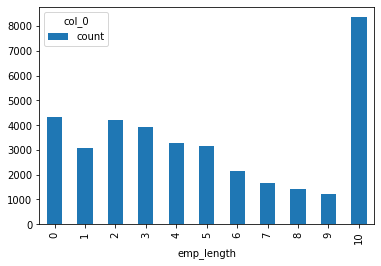

In [20]:
my_tab = pd.crosstab(index = clean_Data["emp_length"],columns="count")  
my_tab.plot.bar()



1.   It can be seen that people above 10 years of work experience have been given more number of loans.
2.   It may be because those with 10+ experience could repay the loan properly or may have good credit score.



In [21]:
(clean_Data["purpose"].value_counts()/clean_Data["purpose"].value_counts().sum())*100

debt_consolidation    47.216703
credit_card           13.057680
other                  9.766720
home_improvement       7.433922
major_purchase         5.580205
small_business         4.485941
car                    3.889811
wedding                2.414460
medical                1.755723
moving                 1.472630
house                  0.944552
vacation               0.928220
educational            0.800283
renewable_energy       0.253151
Name: purpose, dtype: float64



1.   It can be seen that 47% of those who got loan used it to close their previous loans
2.   Also 0.25% of those used the loan to build renewable energy and 0.8% for education which is appreciated.



In [22]:
clean_Data['annual_inc'].describe()

count    3.673700e+04
mean     6.946723e+04
std      6.406256e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [23]:
clean_Data.groupby('loan_status').annual_inc.describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,63407.712614,47893.247256,4080.0,38400.0,54000.0,75000.0,1250000.0
Fully Paid,31534.0,70467.031187,66300.230965,4000.0,42000.0,60000.0,84996.0,6000000.0




1.   It can be seen that on average the annual income of defaulters is less that those who paid the loan properly.
2.  Also in total almost 75% of those earn 83000 but the max income is 6000000 which is clearly a outlier.



In [24]:
clean_Data.groupby('verification_status').annual_inc.describe()


,count,mean,std,min,25%,50%,75%,max
verification_status,,,,,,,,
Not Verified,15521.0,61297.376598,56322.342746,4000.0,38400.0,53000.0,73073.26,3900000.0
Source Verified,9470.0,68646.025961,83937.291327,4800.0,40000.0,55000.0,80000.00,6000000.0
Verified,11746.0,80924.846089,52388.220488,6000.0,50000.0,70000.0,98000.00,1250000.0


In [25]:
clean_Data.groupby('verification_status').loan_status.value_counts()


verification_status  loan_status
Not Verified         Fully Paid     13630
                     Charged Off     1891
Source Verified      Fully Paid      8090
                     Charged Off     1380
Verified             Fully Paid      9814
                     Charged Off     1932
Name: loan_status, dtype: int64



1.   It can be seen that the not verified category as the least annual income in average
2.   But on analysing the other parameters it can be seen that verfication status doesnt depend on the loan status



In [26]:
clean_Data.groupby('purpose').loan_status.value_counts()


purpose             loan_status
car                 Fully Paid      1278
                    Charged Off      151
credit_card         Fully Paid      4298
                    Charged Off      499
debt_consolidation  Fully Paid     14750
                    Charged Off     2596
educational         Fully Paid       247
                    Charged Off       47
home_improvement    Fully Paid      2415
                    Charged Off      316
house               Fully Paid       291
                    Charged Off       56
major_purchase      Fully Paid      1849
                    Charged Off      201
medical             Fully Paid       546
                    Charged Off       99
moving              Fully Paid       460
                    Charged Off       81
other               Fully Paid      3017
                    Charged Off      571
renewable_energy    Fully Paid        76
                    Charged Off       17
small_business      Fully Paid      1212
                    Charg

In [27]:
clean_Data['purpose'].value_counts()

debt_consolidation    17346
credit_card            4797
other                  3588
home_improvement       2731
major_purchase         2050
small_business         1648
car                    1429
wedding                 887
medical                 645
moving                  541
house                   347
vacation                341
educational             294
renewable_energy         93
Name: purpose, dtype: int64



1. It can be seen that most % of charged of loans is under small_business category



In [28]:
clean_Data.groupby('purpose').int_rate.describe()


,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,1429.0,10.522554,3.399640,5.42,7.5100,10.37,13.06,22.85
credit_card,4797.0,11.670655,3.529273,5.42,8.9000,11.49,13.92,24.11
debt_consolidation,17346.0,12.430336,3.717100,5.42,9.9900,12.42,14.96,24.11
educational,294.0,11.753844,2.519069,6.00,9.6625,11.89,13.23,21.27
home_improvement,2731.0,11.310663,3.748933,5.42,7.8800,11.11,13.80,23.22
house,347.0,12.354841,3.949184,5.42,9.6200,11.99,15.30,23.13
major_purchase,2050.0,10.817941,3.585787,5.42,7.5100,10.75,13.48,23.59
medical,645.0,11.526310,3.652116,5.42,8.0000,11.48,14.17,22.06
moving,541.0,11.576174,3.560174,5.42,8.4900,11.36,13.98,22.11


It can be seen that maximum interest rate is applied to small buisness and the least rate to car and major purchase

In [29]:
clean_Data.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,13.925681,3.656808,5.42,11.49,13.79,16.45,24.40
Fully Paid,31534.0,11.659557,3.609064,5.42,8.59,11.49,13.99,24.11


The interest rate for the charged off is higher than the fully paid people.

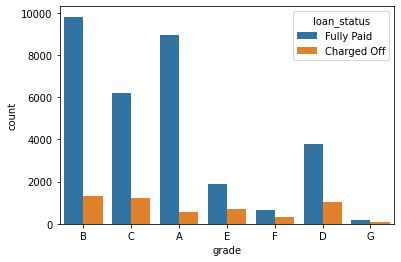

In [30]:
sns.countplot(x=clean_Data['grade'],hue=clean_Data['loan_status'])


It can be seen that the grades A,B,C have got more number of loans

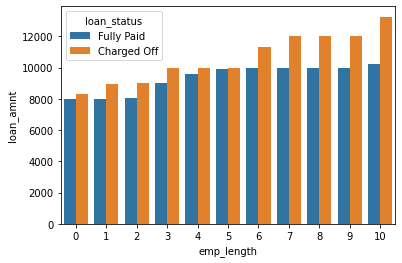

In [31]:
sns.barplot(data=clean_Data,x='emp_length',y='loan_amnt',hue='loan_status',ci=0,estimator=np.median)


It can we seen that greater the work experience greater is the loan amount and also low risk

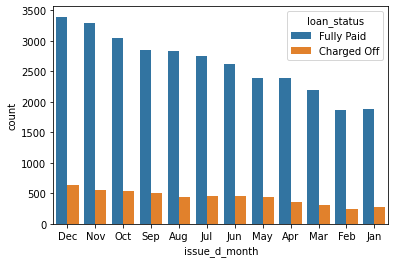

In [34]:
sns.countplot(data=clean_Data,x='issue_d_month',hue='loan_status')


It can be seen that most loan was acquire in the later part of the year, may be due to the expenses planned for the next year

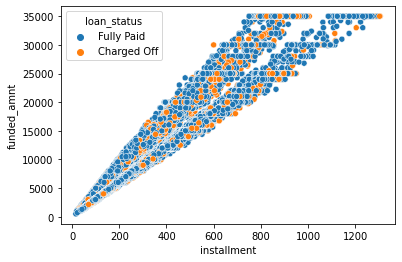

In [35]:
sns.scatterplot(data=clean_Data,x=clean_Data['installment'],y='funded_amnt',hue='loan_status')


It is obvious that greater the funded amount more is the number of installments